<a href="https://colab.research.google.com/github/lancelotH/Drucker/blob/master/MSc_GIS_Intro_to_Python_part_3_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Introduction to Python (session 3) <a class="tocSkip">

#### Content adapted from Francesca Pontin's Introduction to Python course (please contact: F.L.Pontin@leeds.ac.uk) <a class="tocSkip">

# Exercise 1:  getting started with spatial data

As is coding custom we import the required packages at the beginning<br>
<font color='orchid'> <b>Import the packages below </font>

In [1]:
!pip install contextily
!pip install geoplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 41.3 MB/s eta 0:00:00


In [2]:
#Import the required packages

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj
import contextily as ctx
import seaborn as sns
import geoplot as gplt


We have imported a few new packages including 'geopandas'. Geopandas works like pandas but also handles spatial data. Geopandas was designed to allow people to easily handle and use spatial datasets in Python. <br>

## Reading in spatial data
We need to read these shp files in, geopandas work the same way as pandas, but are also able to handle the spatial element of the dataset. Therefore the code we use is very similar. We use <code>geopandas.read_file(<font color =red>file_path</font>) </code> replacing <font color =red>"file_path"</font>, with the actual path to the shapefile you want to use. ["A shapefile is an Esri vector data storage format for storing the location, shape, and attributes of geographic features. It is stored as a set of related files and contains one feature class."](https://doc.arcgis.com/en/arcgis-online/reference/shapefiles.htm).

<div class="alert alert-block alert-info">
<b>Note:</b> This is very similar to the <code>pd.read_csv() function</code>
</div>

<font color='orchid'> Run the code below to read the spatial data in </font>

In [3]:
# Read in the shape file data
urlcountries = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
urlcities = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_populated_places.zip"
cities = gpd.read_file(urlcities)
countries = gpd.read_file(urlcountries)

### Data Exploration
Just as we have done before we are going to explore the data by having a look at the dataframes and by visualising both the data sets.

In [6]:
# let's have a look at the cities geopandas dataframe
pd.set_option('display.max_columns', None)
cities.head(n=2)

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,WORLDCITY,MEGACITY,SOV0NAME,SOV_A3,ADM0NAME,ADM0_A3,ADM1NAME,ISO_A2,NOTE,LATITUDE,LONGITUDE,POP_MAX,POP_MIN,POP_OTHER,RANK_MAX,RANK_MIN,MEGANAME,LS_NAME,MAX_POP10,MAX_POP20,MAX_POP50,MAX_POP300,MAX_POP310,MAX_NATSCA,MIN_AREAKM,MAX_AREAKM,MIN_AREAMI,MAX_AREAMI,MIN_PERKM,MAX_PERKM,MIN_PERMI,MAX_PERMI,MIN_BBXMIN,MAX_BBXMIN,MIN_BBXMAX,MAX_BBXMAX,MIN_BBYMIN,MAX_BBYMIN,MIN_BBYMAX,MAX_BBYMAX,MEAN_BBXC,MEAN_BBYC,TIMEZONE,UN_FID,POP1950,POP1955,POP1960,POP1965,POP1970,POP1975,POP1980,POP1985,POP1990,POP1995,POP2000,POP2005,POP2010,POP2015,POP2020,POP2025,POP2050,MIN_ZOOM,WIKIDATAID,WOF_ID,CAPALT,NAME_EN,NAME_DE,NAME_ES,NAME_FR,NAME_PT,NAME_RU,NAME_ZH,LABEL,NAME_AR,NAME_BN,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_SV,NAME_TR,NAME_VI,NE_ID,NAME_FA,NAME_HE,NAME_UK,NAME_UR,NAME_ZHT,GEONAMESID,FCLASS_ISO,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,8,10,3,Admin-0 capital,Vatican City,None,None,Vatican City,1,None,1,0,Vatican,VAT,Vatican,VAT,Lazio,VA,None,41.903282,12.453387,832,832,562430,2,2,None,Vatican City,636762,636762,0,0,0,20,177,177,68,68,160,160,99,99,12.333333,12.333333,12.481009,12.481009,41.766667,41.766667,42.05,42.05,12.419907,41.903477,Europe/Vatican,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.0,Q237,101914185,0,Vatican City,Vatikanstadt,Ciudad del Vaticano,Cité du Vatican,Vaticano,Ватикан,梵蒂冈,None,الفاتيكان,ভ্যাটিকান সিটি,Βατικανό,वैटिकन नगर,Vatikán,Vatikan,Città del Vaticano,バチカン,바티칸 시국,Vaticaanstad,Watykan,Vatikanstaten,Vatikan,Thành Vatican,1159127243,واتیکان,קריית הוותיקן,Ватикан,ویٹیکن سٹی,梵蒂岡,6691831,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (12.45339 41.90328)
1,7,20,0,Admin-0 capital,San Marino,None,None,San Marino,1,None,0,0,San Marino,SMR,San Marino,SMR,None,SM,None,43.936096,12.441770,29579,29000,0,7,7,None,San Marino,29088,29579,0,0,0,20,30,30,11,11,63,63,39,39,12.391667,12.391667,12.541667,12.541667,43.900000,43.900000,44.00,44.00,12.462153,43.953472,Europe/San_Marino,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.1,Q1848,101837381,0,San Marino,San Marino,San Marino,Saint-Marin,San Marino,Сан-Марино,圣马力诺,None,مدينة سان مارينو,সান মারিনো,Άγιος Μαρίνος,सैन मारिनो नगर,San Marino,San Marino,Città di San Marino,サンマリノ市,산마리노,San Marino,San Marino,San Marino,San Marino,Thành phố San Marino,1159146051,سن مارینو,סן מרינו,Сан-Марино,سان مارینو شہر,聖馬力諾,3168070,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (12.44177 43.9361)


In [5]:
# check the row and column of dataframe
cities.shape

(243, 138)

Note that the dataframe has 138 columns in which:
- 'NAME' naming the city
- 'geometry' listing the type of geometry, in this case POINT. And two numbers - the coordinates of the point.

In [7]:
# we create a new dataframe with only coloums: 'NAME' and 'geometry'
cities = cities[['NAME', 'geometry']]

In [8]:
# check the new dataframe
cities.head()

,NAME,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.9361)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.2 -26.46667)
4,Luxembourg,POINT (6.13 49.61166)


## Simple spatial data visualisation
### Point data

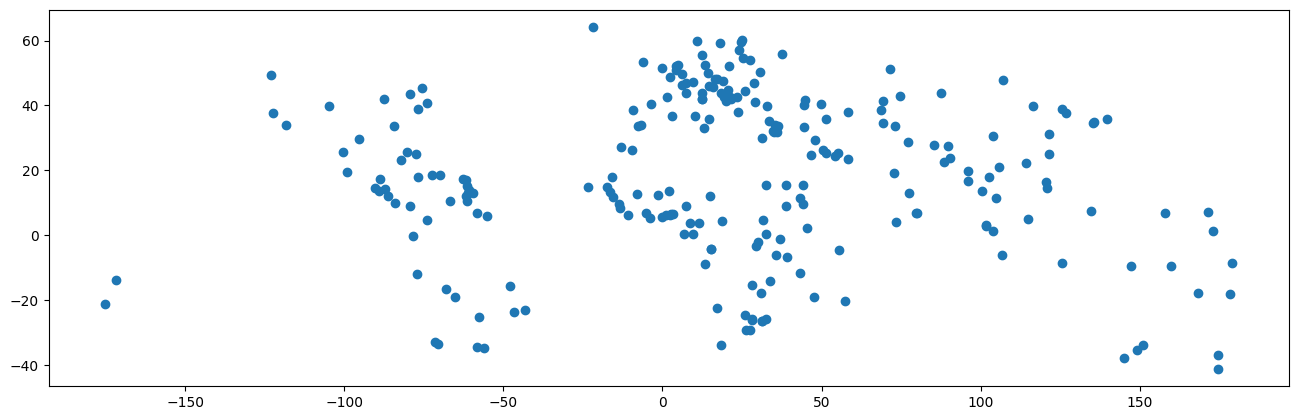

In [9]:
# Plot the cities data

# define the plot size and nummber of subplots (1 i.e. 1 plot)
f, ax = plt.subplots(1, figsize=(16, 8))
# plot the  cities, specifying the subplot axis
cities.plot(ax=ax)
# show the plot
plt.show()

Now we will do the same for the countries dataframe.

### Polygon data

In [10]:
# Explore the countries dataframe
countries.head()


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,FJI,0,Fiji,FJI,0,Fiji,FJI,0,Fiji,Fiji,FJI,Fiji,None,Fiji,FJ,Republic of Fiji,None,Fiji,None,None,Fiji,None,5,1,2,2,889953.0,11,2019,5496,2019,6. Developing region,4. Lower middle income,FJ,FJ,FJ,FJI,FJI,242,242,242,FJ,FJI,23424813,23424813,Exact WOE match as country,FJI,None,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,4,4,4,-99,1,0.0,3.0,8.0,177.975427,-17.826099,1159320625,Q712,فيجي,ফিজি,Fidschi,Fiji,Fiyi,فیجی,Fidji,Φίτζι,פיג'י,फ़िजी,Fidzsi-szigetek,Fiji,Figi,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Фіджі,فجی,Fiji,斐济,斐濟,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,Tanzania,TZA,Tanzania,None,Tanz.,TZ,United Republic of Tanzania,None,Tanzania,None,None,Tanzania,None,3,6,2,2,58005463.0,16,2019,63177,2019,7. Least developed region,5. Low income,TZ,TZ,TZ,TZA,TZA,834,834,834,TZ,TZA,23424973,23424973,Exact WOE match as country,TZA,None,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,3.0,8.0,34.959183,-6.051866,1159321337,Q924,تنزانيا,তানজানিয়া,Tansania,Tanzania,Tanzania,تانزانیا,Tanzanie,Τανζανία,טנזניה,तंज़ानिया,Tanzánia,Tanzania,Tanzania,タンザニア,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Танзанія,تنزانیہ,Tanzania,坦桑尼亚,坦尚尼亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,SAH,0,Western Sahara,SAH,0,Western Sahara,SAH,1,W. Sahara,Western Sahara,B28,W. Sahara,None,W. Sah.,WS,Sahrawi Arab Democratic Republic,None,Western Sahara,None,Self admin.; Claimed by Morocco,Western Sahara,None,4,7,4,4,603253.0,11,2017,907,2007,7. Least develope

In [11]:
# create a new dataframe with columnes: 'SOVEREIGNT', 'POP_EST', 'CONTINENT', 'GDP_MD' and 'geometry'
countries = countries[['SOVEREIGNT', 'POP_EST', 'CONTINENT','GDP_MD','geometry']]

In [12]:
# check the new dataframe
countries.head(n=2)

,SOVEREIGNT,POP_EST,CONTINENT,GDP_MD,geometry
0,Fiji,889953.0,Oceania,5496,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,United Republic of Tanzania,58005463.0,Africa,63177,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."


<b>Note</b> the geometry column this time is made up of POLYGON data, made up of many coordinate points. <br>
Let us have a closer look at the polygon geometry. We are going to look at the geometry of row 1.

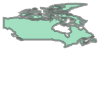

In [13]:
# Lets look at index 3 (for me it is Canada) of the geometry column
# Notice the shape is quite complex with lots of edges
countries.loc[3,'geometry']

In [14]:
# let us look at the list of coordinates
print(countries.loc[3,'geometry'])
# Each point is a corner of the country

MULTIPOLYGON (((-122.84000000000003 49.000000000000114, -122.97421000000001 49.00253777777778, -124.91024 49.98456, -125.62461 50.416560000000004, -127.43561000000001 50.83061, -127.99276 51.71583, -127.85032 52.32961, -129.12979 52.75538, -129.30523 53.561589999999995, -130.51497 54.28757, -130.53610895273684 54.80275447679924, -130.53611 54.802780000000006, -129.98 55.285000000000004, -130.00778000000003 55.915830000000085, -131.70781 56.55212, -132.73042 57.692890000000006, -133.35556000000003 58.41028000000001, -134.27111000000002 58.86111000000005, -134.94500000000005 59.2705600000001, -135.47583 59.787780000000005, -136.47972000000004 59.46389000000005, -137.4525 58.905, -138.34089 59.562110000000004, -139.03900000000002 60, -140.013 60.27682000000001, -140.99778 60.30639000000001, -140.9925 66.00003000000001, -140.986 69.712, -140.98598761037601 69.71199839952635, -139.12052 69.47102, -137.54636000000002 68.99002, -136.50358 68.89804, -135.62576 69.31512000000001, -134.414640000

### Now let's plot all the countries

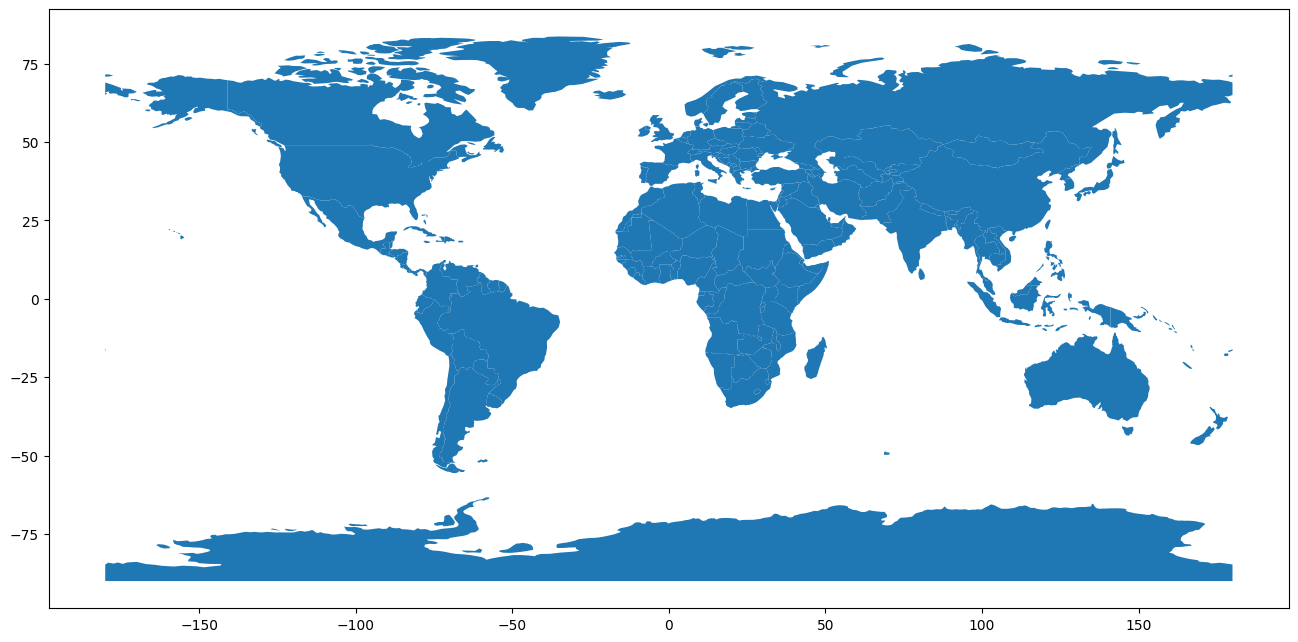

In [18]:
f,ax = plt.subplots(1, figsize=(16, 30))
countries.plot(ax=ax)
plt.show()

## Coordinate Reference Systems (CRS)
Before we map multiple layers we need to check they have the same Coordinate Reference System (CRS). Using the <code>.crs</code> function

In [19]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Look at what happens when we change the projection

In [20]:
# NAD83 Canadian Spatial Reference System: Large and medium scale topographic mapping and engineering survey.
countries_new_proj= countries.to_crs(epsg=2953)

# EPSG:3851 New Zealand Geodetic Datum 2000: Spatial referencing and conformal mapping on the NZ continental shelf.
countries_new_proj2= countries.to_crs(epsg=3851)

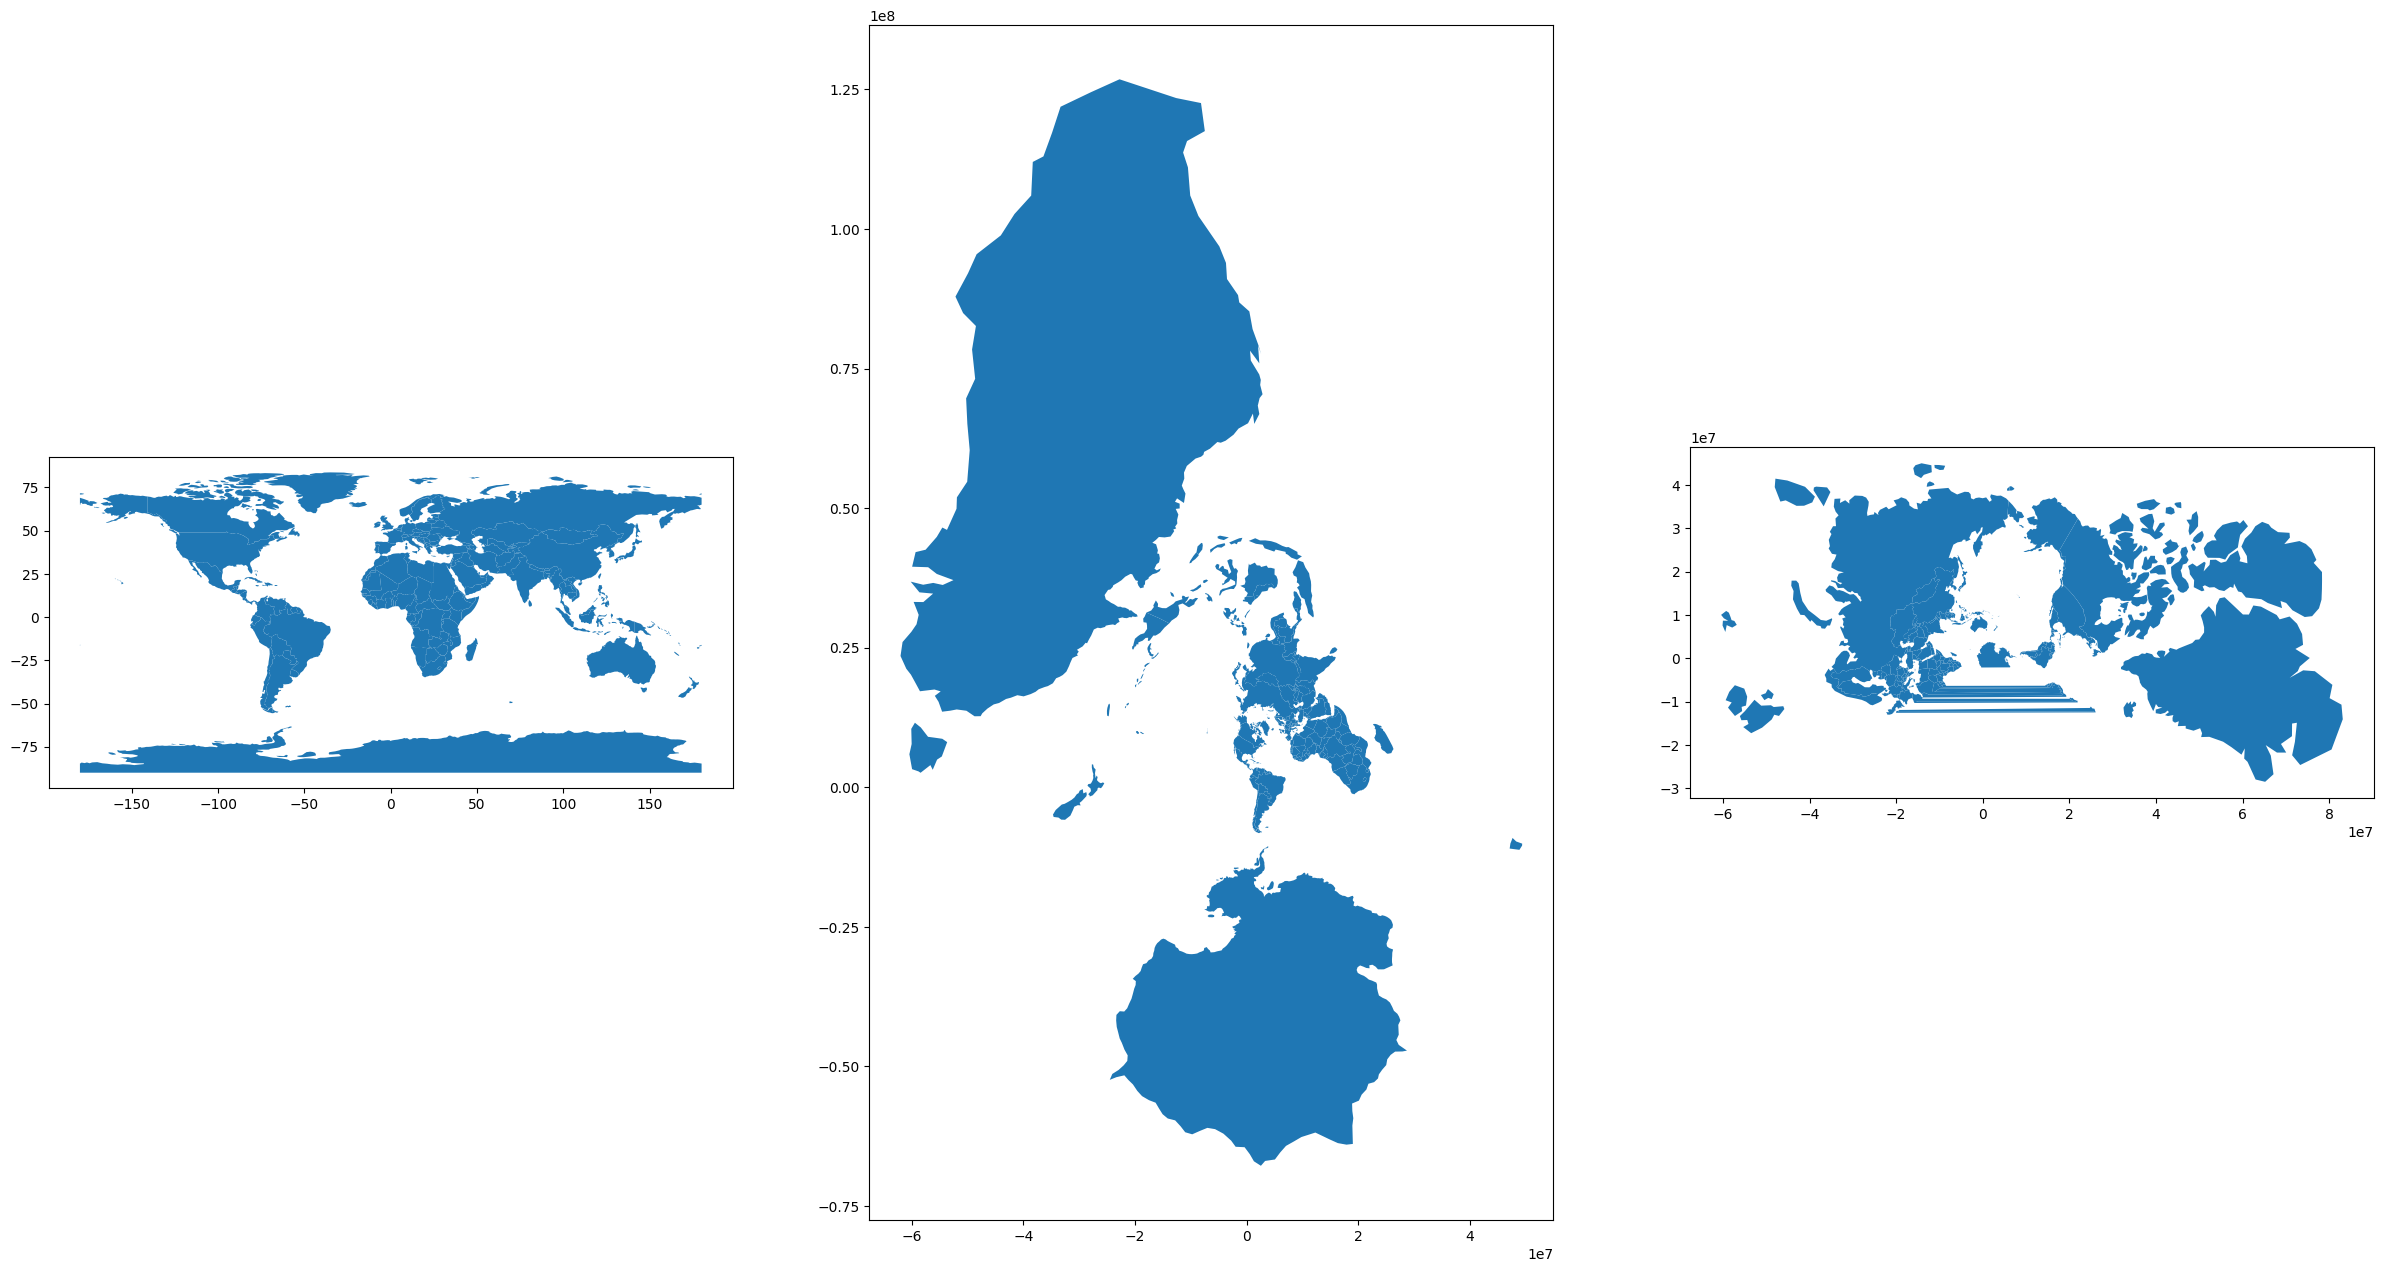

In [21]:
# plot the two diifferent projections
f, ax = plt.subplots(1,3, figsize=(30, 20))
countries.plot(ax=ax[0])
countries_new_proj.plot(ax=ax[1])
countries_new_proj2.plot(ax=ax[2])
plt.show()
# Note the different scales on the axis and orrientation of the countries

## Layering maps
Much like other mapping software it is possible to layer maps in Python. We will plot the cities on top of the countries dataset.

We need to check the CRS of both datasets is the same so we can accurately plot the layers on top of each other

In [22]:
# Check the CRS are the same
print(cities.crs, countries.crs)

EPSG:4326 EPSG:4326


## Plot the cities and countries together

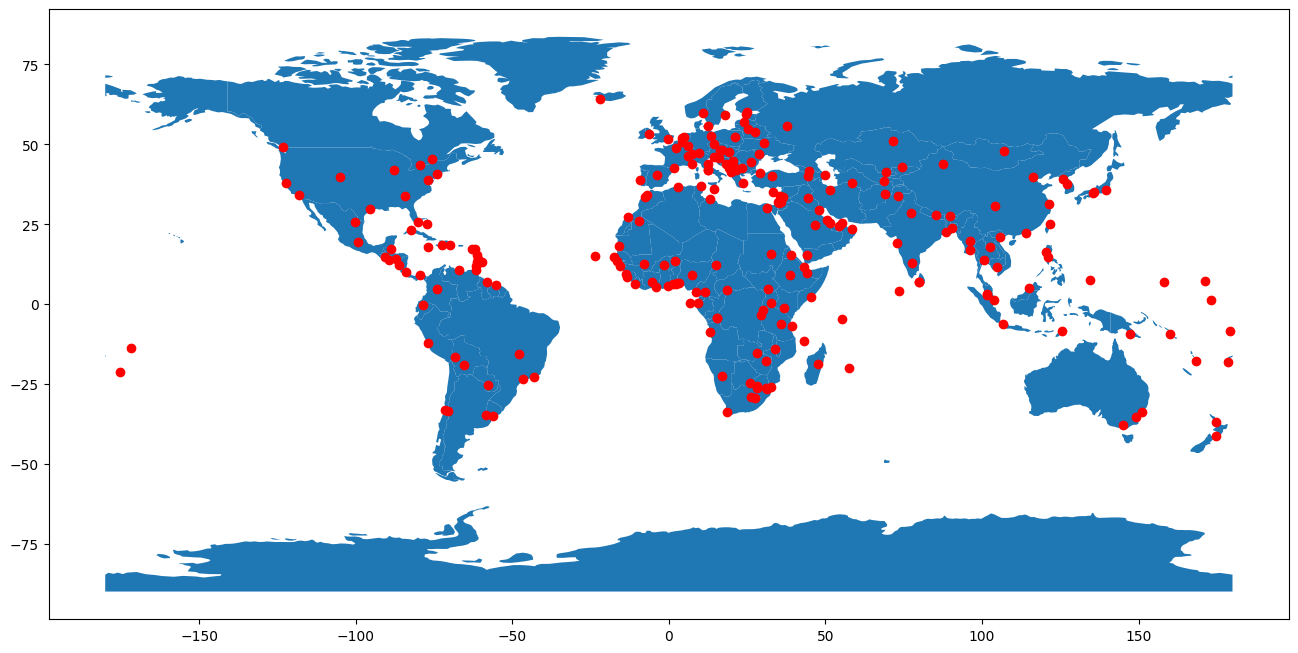

In [23]:
# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = countries.plot(ax=ax)

# plot the cities on the basemap axis, colour the cities red
cities.plot(ax=base,color='red')

# shw the map
plt.show()

## Choropleth Mapping
Choropleth maps denote an increase or decrease in value using darker or lighter shades or different colours e.g. Population

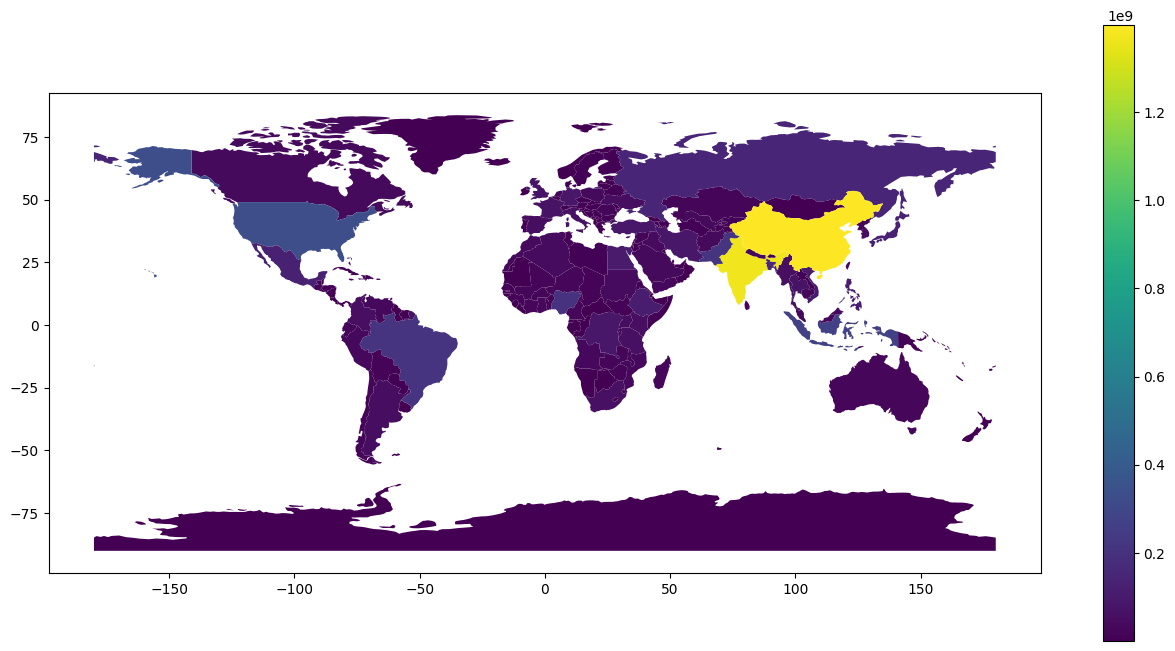

In [24]:
# Define plot size
f,ax = plt.subplots(1, figsize=(16,8))
# Plot the countries, specifying to plot the population estimate column
# Add legend
countries.plot(ax=ax, column ='POP_EST', legend=True)
plt.show()

We might instead want to plot the percentage of the world population in each country, to do this we can edit the scale of the colour bar.

<ipython-input-25-3e98e33d1fbb>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  colourbar.set_yticklabels(['{0:.2f}%'.format(ytick) for ytick in yticks])


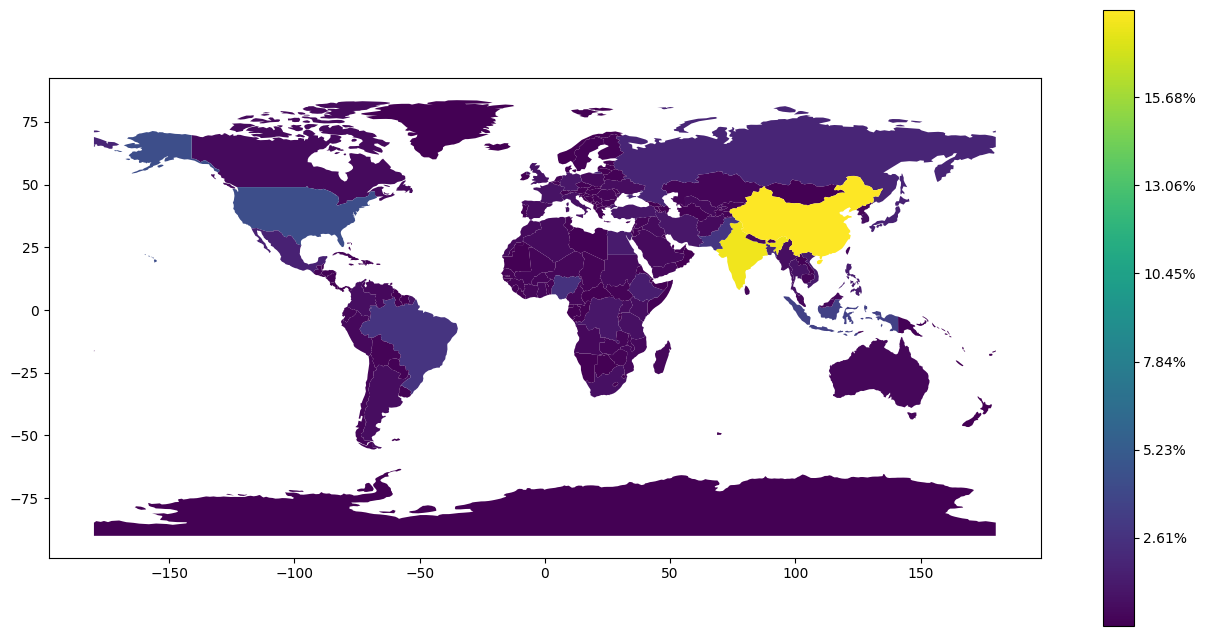

In [25]:
# Define plot size
f,ax = plt.subplots(1, figsize=(16,8))
# Plot the countries, specifying to plot the population estimate column
# Add legend
countries.plot(ax=ax, column ='POP_EST', legend=True)

colourbar = ax.get_figure().get_axes()[1]

# Get numerical values of yticks, and calcualte as percentageof the total world popualtion:
yticks = colourbar.get_yticks()/countries['POP_EST'].sum()*100

# Apply some function f to each tick, where f can be your percentage conversion
colourbar.set_yticklabels(['{0:.2f}%'.format(ytick) for ytick in yticks])

plt.show()

<font color= 'orchid'> <b>Code your own choropleth map for 'GDP_MD'<b></font><br>


<ipython-input-26-b0410ff88618>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  colourbar.set_yticklabels(['{0:.2f}%'.format(ytick) for ytick in yticks])


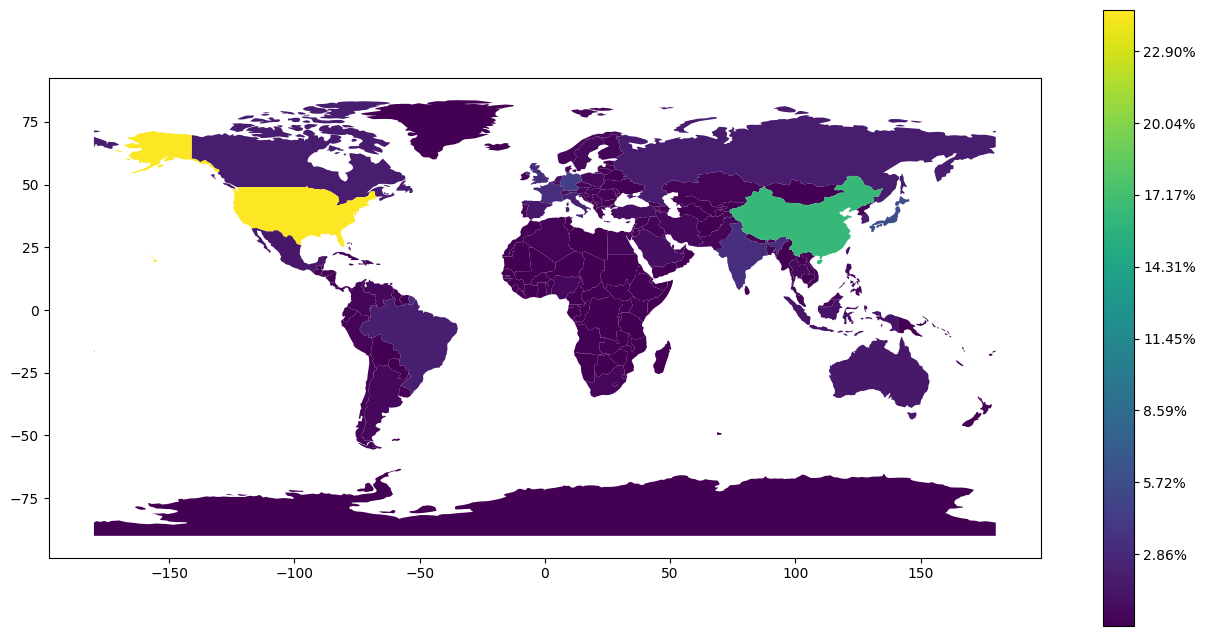

In [26]:
# code your choropleth map here!
# Define plot size
f,ax = plt.subplots(1, figsize=(16,8))
# Plot the countries, specifying to plot the population estimate column
# Add legend
countries.plot(ax=ax, column ='GDP_MD', legend=True)

colourbar = ax.get_figure().get_axes()[1]

# Get numerical values of yticks, and calcualte as percentageof the total world popualtion:
yticks = colourbar.get_yticks()/countries['GDP_MD'].sum()*100

# Apply some function f to each tick, where f can be your percentage conversion
colourbar.set_yticklabels(['{0:.2f}%'.format(ytick) for ytick in yticks])

plt.show()

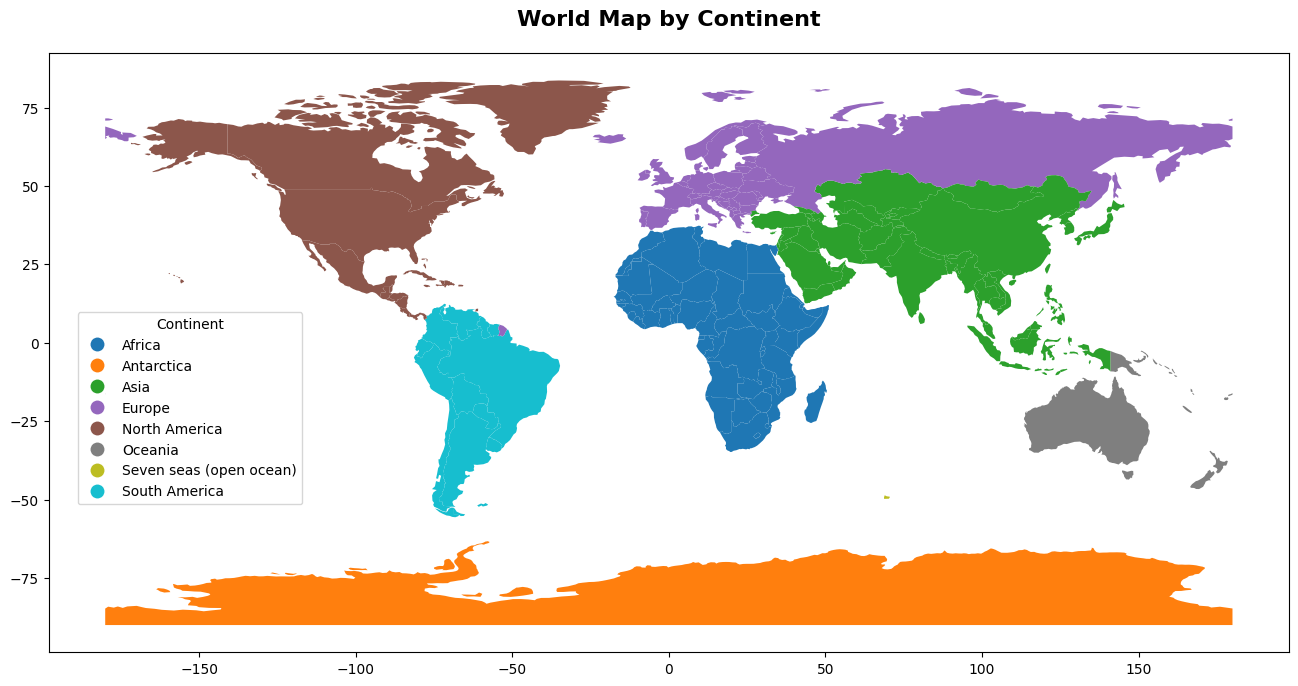

In [44]:
# code your choropleth map here!
# Define plot size
f,ax = plt.subplots(1, figsize=(16,8))
# Plot the countries, specifying to plot the population estimate column
# Add legend
countries.plot(ax=ax, column ='CONTINENT', legend=True)
# Customize the legend placement
leg = ax.get_legend()  # 获取图例对象
leg.set_bbox_to_anchor((0.21, 0.58))  # 设置图例的位置 (x, y)
leg.set_title("Continent")  # 可选：为图例添加标题

# 添加标题
ax.set_title('World Map by Continent', fontsize=16, fontweight='bold', pad=20)

plt.show()

### Plotting Categorical variables
It is possible to create choropleth maps with categorical variables. To do this we specify <code> categorical=True,</code> withn the <code>plot()</code> function.<br> If we treat the continent of the country as a categorical variable we can colour the countries based on the continent they are in.<br>

Note the legend of the map is now separate colours and not a continuous colour bar

<font color ='orchid'> <b> Run the code below to plot a categorical choropleth </font>

In [ ]:
f,ax = plt.subplots(1, figsize=(16,8))
countries.plot(ax=ax, column ='CONTINENT', categorical=True, legend=True)
plt.show();

## Subsetting spatial data
We can also work with and plot just a subset of the spatial data. For example we might only be interested in Africa. In which case we can use the <code>.loc[]</code> fucntion to locate all rows (countries) where the continent is Africe. Just like we would normally do in a non-spatial pandas dataframe.<br>

<font color ='orchid'> <b>Run the code below </font>

In [27]:
# locate countries (rows) in Africa
africa= countries.loc[countries['CONTINENT']=='Africa']
# view the newly created Africa dataframe
africa

,SOVEREIGNT,POP_EST,CONTINENT,GDP_MD,geometry
1,United Republic of Tanzania,58005463.0,Africa,63177,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Western Sahara,603253.0,Africa,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
11,Democratic Republic of the Congo,86790567.0,Africa,50400,"POLYGON ((29.34 -4.49998, 29.51999 -5.41998, 2..."
12,Somalia,10192317.3,Africa,4719,"POLYGON ((41.58513 -1.68325, 40.993 -0.85829, ..."
13,Kenya,52573973.0,Africa,95503,"POLYGON ((39.20222 -4.67677, 37.7669 -3.67712,..."
14,Sudan,42813238.0,Africa,30513,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ..."
15,Chad,15946876.0,Africa,11314,"POLYGON ((23.83766 19.58047, 23.88689 15.61084..."
25,South Africa,58558270.0,Africa,351431,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."
26,Lesotho,2125268.0,Africa,2376,"POLYGON ((28.97826 -28.9556, 29.32517 -29.2573..."
48,Zimbabwe,14645468.0,Africa,21440,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


It is now possible to plot just Africa. We can also put maps side by side to compare them. Here we are going to plot population estimate for each country and the estimated GDP for each country.<br>

<font color = 'orchid'> <b> Run the code below,</b> make sure you understand what each line does (there is a lot going on)</font>

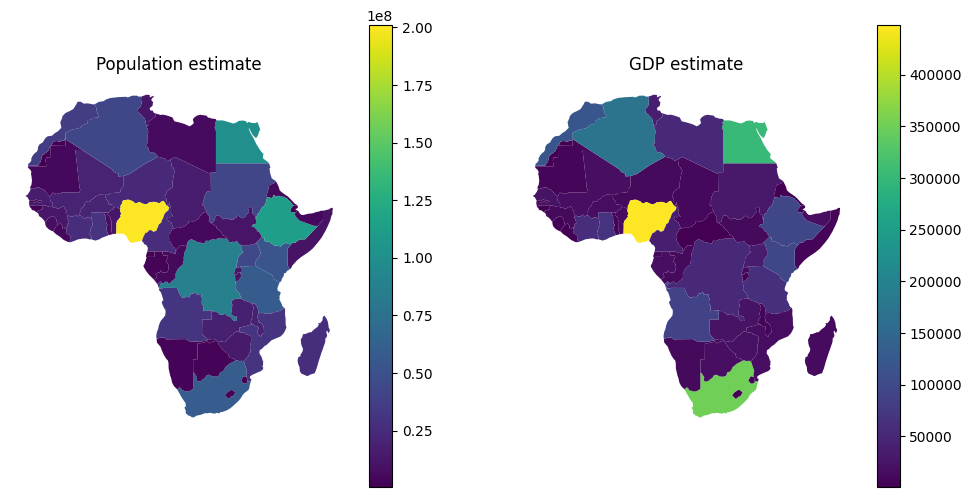

In [28]:
# create a figure with two subplots (maps)
f,ax = plt.subplots(1,2, figsize=(12,6))

# plot population estimate in subplot 1
africa.plot(ax=ax[0], column ='POP_EST', legend=True)

# plot gdp estimate in subplot 2
africa.plot(ax=ax[1], column ='GDP_MD', legend=True)

# give subplot 1 an informative title
ax[0].set_title('Population estimate')

# give subplot 2 an informative title
ax[1].set_title('GDP estimate')

# make axis invisible for subplot 1
ax[0].set_axis_off()

# make axis invisible for subplot 1
ax[1].set_axis_off()

# show figure
plt.show()

## Subplots and axes

A quick note on the subplot and ax indexing. It can be a little tricky getting your head around the indexing used when creating subplots.
To create mulitple subplots you use the code below, specifying firstly the number of rows then the number of columns. <br>
<code>.subplots([number of rows], [number of columns])</code>

When you are then specifyng each individual plot, you need to specify the axes of the plot, using the code <code> ax=ax[]</code>. The indexing for the axes starts at 0. I.e. the first row is 'row 0' and the first column, 'column 0'.

For a set of subplots with just one row you only need to specify the column in the <code>ax=ax[]</code> function. <br>
I.e. <code>ax=ax[column number]</code> <br>

I.e.<code> plt.subplot(1,2) <br>
dataframe.plot(ax=ax[0], ...
dataframe.plot(ax=ax[1], ... </code>

Similarly for a set of subplots with just one column you only need to specify the row in the <code>ax=ax[]</code> function. <br>
<code> plt.subplot(2,1) <br>
dataframe.plot(ax=ax[0], ...
dataframe.plot(ax=ax[1], ... </code>
</code>

For a set of subplots with just multiple rows and columns you only need to specify both in the <code>ax=ax[,]</code> funciton.(row first then column)<br>
<code>plt.subplot(2,3)<br>
dataframe.plot(ax=ax[0,0], ...
dataframe.plot(ax=ax[0,1], ...
dataframe.plot(ax=ax[0,2], ...
<br>dataframe.plot(ax=ax[1,0], ...
dataframe.plot(ax=ax[1,1], ...
dataframe.plot(ax=ax[1,2], ...</code>

<div class="alert alert-block alert-warning">
    
## Extra task

### The data

In [ ]:
usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

# remove cities in sates not in the contiguous USA (not connected directly to the mainland), for ease of plotting
continental_usa_cities = usa_cities.loc[(usa_cities['STATE'] !="HI") & (usa_cities['STATE'] !="AK" ) & (usa_cities['STATE'] !="PR")]


In [ ]:
continental_usa_cities.head()

In [ ]:
continental_usa_cities.plot()

In [ ]:
contiguous_usa.head()

In [ ]:
contiguous_usa.plot()

### Tasks:
- check the CRS of both geo data frames
- produce a layered map of cities and states
- produce a choropleth map of popualation
- colour city by state
- subset the data to plot a single state e.g. Washington

# Exercise 2: Mapping spatial data

## Geometric Manipulations

### Buffers

A buffer in geographic information system (GIS) is a zone around a map feature measured in units of distance or time.

In Python we specify the buffer size: the radius of the buffer (in this case size is measured in degrees as the projection is EPSG 4326).

E.g.:
<code> dataframe.crs ={'init': 'epsg:4326'} </code>

<code> dataframe.buffer(distance =10) </code> distance = 10 degrees.

<ipython-input-29-7e449b46318b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cities.buffer(distance=10).plot();


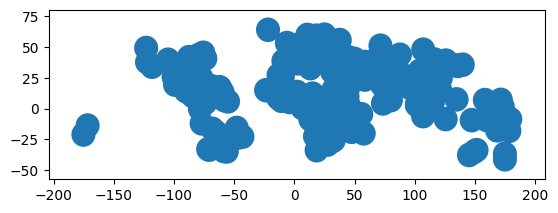

In [29]:
cities.buffer(distance=10).plot();

If we want to measure the buffer in meters we can change the projection to [EPSG 3857](https://epsg.io/3857) where the projection unit is meters (rather than degrees).

Note: At the world scale this will result in errors in measurement due to the earth curvature. At a smaller scale, depending on where you are mapping other projections are more suitable e.g. [EPSG:4959](https://epsg.io/4959) is used in New Zealand

In [ ]:
#Plot 500 km (500,0000 m) buffer arround cities

# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

cities.to_crs('epsg:3857').buffer(distance=500000).plot(ax=ax)

plt.show()

In order to keep information about the area begin buffered in the newly created buffer geo-data-frame it is useful to copy the original data you want to conduct the geometric maipulation on, and name it something else e.g. data_buffer.

Then replace the geometry column in the copied data with the calculated buffer geometry.

E.g.
<code> dataframe_buffer = dataframe.copy() </code>

<code> dataframe_buffer['geometry'] = dataframe.buffer(distance)</code>

In [ ]:
# copy the cities dataframe
cities_buffer = cities.copy()

# apply the function (replacing the geometry column with the buffer geometry)
cities_buffer['geometry'] = cities.buffer(10)

cities_buffer.head()

Note because we copied the cities data frame above the cities_buffer data frame contains the name of the city.

<font color = 'orchid'> <b> Try just running the code </b> <code>cities.buffer(10, resolution=10)</code>. </font>
    
Note we get a geopandas array with the geometry data but not the corresponding city that is being buffered

In [ ]:
# run the code
cities.buffer(10, resolution=10)

We can add the cities_buffer layer to the map along with the countries and cities layers.

<font color = 'orchid'> <b> Run the code below, read the comments to understand what each line of code is doing  </font>

In [ ]:
# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = countries.plot(ax=ax, color='grey')

# plot the city buffers on the basemap axis, colour buffers blue
cities_buffer.plot(ax=base,color='blue', alpha=0.2)

# plot the cities on the basemap axis, colour the cities red
cities.plot(ax=base,color='red')

# shw the map
plt.show()

### Centroids

Put simply the centroid is the center most point of a polygon (there are different debated methods of calculating centroids, but unless you are using centroids for a specific purpose the method should not matter too much).

#### Why calculate centroids?

Lots of geometric manipulations and analysis use centroids. For example you might use centroids to as a proxy to measure the distance between two polygons.


<font color = 'orchid'> <b>Use the code </b> <code> dataframe.centroid </code> <b>to find the country centroids (run the next 3 cells of code for the worked example below) </font>

In [ ]:
# copy the countries dataframe
countries_centroid = countries.copy()

# calcualte the centorid
# and replace the country geometry (polygon) with the centroid geometry (point)
countries_centroid['geometry'] = countries.centroid

# check - geometry should contain point data
countries_centroid.head()

In [ ]:
# plot to check it looks as expected
countries_centroid.plot();

In [ ]:
# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = countries.plot(ax=ax, color='grey')

# plot the country centroids on the basemap axis, colour the centroids purple
countries_centroid.plot(ax=base,color='purple')

# show the map
plt.show()

We can also change marker size and colour of plotted points to reflect the data they represent (as we did with the chloropleth maps for polygon data).

Note as population sizes are large (i.e. millions) I have assigned marker size to 'pop_est'/1,000,000, so the markers are plot-able.

<font color = 'orchid'> <b>Run the code below, then try removing or reducing the size of <code>/1000000</code> and see what happens </font>

In [ ]:
# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = countries.plot(ax=ax, color='grey')

# plot the country centroids on the basemap axis, colour the centroids purple
countries_centroid.plot(ax=base,column='POP_EST',markersize=countries['POP_EST']/1000000, legend=True)

# make axis invisible
ax.set_axis_off()

# show the map
plt.show()

### Convex hull polygons

A convex hull is the smallest polygon that you can draw around a collection of points/a polygon.

<font color = 'orchid'> <b>Run the code below to create convex hull polygons (using the code </b><code> dataframe.convex_hull</code><b> around the countries in Africa </font>

In [ ]:
africa_convex_hull = africa.copy()

africa_convex_hull['geometry'] = africa.convex_hull

# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = africa.plot(ax=ax, color='grey')

# plot the africa convex hull polygons
# .boundary alows us to just plot the polygon outline
africa_convex_hull.boundary.plot(ax=base)

# make axis invisible
ax.set_axis_off()

# show the map
plt.show()

<div class="alert alert-block alert-warning">

### Coding task
Try:
    - Buffering the countries centroids
    - Buffering the Africa convex hull polygons
    - Getting the centroid of the africa convex hull polygons
    - Getting the convex hull polygons of all the countries (note this might look a bit messy)
    


## Spatially aggregating data
Often our data will not be at the same spatial scale so we may need to aggregate areas of data together to get them to the same spatial scale. Or we may only be interested in larger spatial trends. Therefore we need to convert our smaller area data to larger area data. In geopandas we can easily do this using the <code>dissolve</code> function.
In this example we are going to aggregate countries up to continent level. <br>
Think of dissolve as removing all the internal country boarders within the continent to leave just the continent outline.<br>
The data for the continent also gets aggregated e.g. estimated population and GDP. <br>
<font color='orchid'> <b> Run the code below </font>

In [ ]:
# specify which columns from the countries dataframe we are going to aggreagate,
# use the continent column to inform the dissolve
# continents = countries[['continent', 'pop_est', 'geometry','gdp_md_est']].dissolve(by='continent', aggfunc='mean').reset_index()

continents = countries[['CONTINENT', 'POP_EST', 'geometry','GDP_MD']].dissolve(by='CONTINENT', aggfunc='mean').reset_index()
# view the new continents dataframe
continents

Think carefully about how you want to aggregate the columns, we can assign an aggfunction to each column. For each column we specify which function we want to apply to the aggreagated rows.<br>
The <code>{}</code> indicate a dictionary object where a set of objects (keys) are mapped to another set of objects (values)
i.e. the column is mapped to the required aggregation method: <code>, aggfunc={'pop_est':'sum','gdp_md_est':'mean'})</code>



In [ ]:
continents = countries[['CONTINENT', 'POP_EST', 'geometry','GDP_MD']].dissolve(by='CONTINENT', aggfunc={'POP_EST':'sum','GDP_MD':'mean'}).reset_index()

# view the new continents dataframe
continents

<font color='orchid'> Run the code below and check you understand what it is doing </font>


Think carefully about how you want to aggregate the columns, we can assign an aggfunction to each column

E.g.
<code>, aggfunc={'gdp_md_est':'sum','pop_est':'mean'})</code>

There is no quick way to assign multiple columns the same function so with a large dataset you might want to consider which columns you include in the aggregated spatial data frame.


In [ ]:
africa_cont = gpd.GeoDataFrame(continents.loc[continents['CONTINENT']=='Africa'])
africa_cont

In [ ]:
# create a figure with two subplots (maps)
f,ax = plt.subplots(3,1, figsize=(12,20),sharex=True, sharey=True)

# plot countries mid year GDP estimate
countries.plot(ax=ax[0], column ='GDP_MD', vmin=0,vmax=countries['GDP_MD'].max() ,legend=True)

# plot countinent average mid year GDP estimate, default legend scale
continents.plot(ax=ax[1], column ='GDP_MD', vmin=0,legend=True)

# plot countinent average mid year GDP estimate: countries legend scale
continents.plot(ax=ax[2], column ='GDP_MD', vmin=0,vmax=countries['GDP_MD'].max() ,legend=True)

#patch_col = ax[0].collections[0]
#cb = f.colorbar(patch_col, ax=ax, shrink=0.5)

# make axis invisible for subplots
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

# give subplot 1 an informative title
ax[0].set_title('GDP estimate: countries')

# give subplot 2 an informative title
ax[1].set_title('GDP estimate: continent average (scale=default)')

# give subplot 2 an informative title
ax[2].set_title('GDP estimate: continent average (scale=contries scale)')

# show figure
plt.show()

<font color= 'orchid'><b>Run the code below to plot a choropleth map of popualtion estimates for the continents</font>

In [ ]:
f,ax = plt.subplots(1, figsize=(16,8))
continents.plot(column='POP_EST',legend=True, ax=ax)
# remove axis
ax.set_axis_off()
plt.show();

<font color='orchid'> <b>Try plotting continents by 'gdp_md_est' </font> <br>


In [ ]:
#  plot here!

## Joining a non-spatial dataset to a spatial dataset

We are going to read in some data about forest coverage of differenet countires and join it to the countires dataframe

<font color ='orchid'><b> Run the code below to read in a csv of country forest coverage data </font>

In [ ]:
# read in csv data using pandas
forest = pd.read_csv('https://raw.githubusercontent.com/Na-Leeds/MSc_GIS_Intro_to_Python/refs/heads/main/country_forest.csv')
# have a quick look at the dataframe
forest.head()

The 'country' column in the forest dataframe matches that of the 'name' column in the countries dataframe. As they are formatted in exaclty the same way and each row is unique the country name is a unqiue identifier common to both dataframes. Therefore we will use this column to join our datasets. <br>
The code we will use is <code>pd.merge()</code>. We need to specify a few parameteres within the function:<br>

- Firstly we specify which dataframes we want to join (in the order we want to join them).<br>
<code> pd.merge(countries, forest... </code> <br>


- Secondly we need to specify the column in each dataframe, countries is on the left so we specify left_on='SOVEREIGNT': as we are using the 'SOVEREIGNT' column from the countires dataframe. And the forest dataframe is on the right so we specify right_on='country' as we are using the 'country' column.<br>
<code> pd.merge(countries, forest, left_on='name', right_on='country' ... </code> <br>


- Finally we need to specify how the tables are joined. This is based on [SQL join fomats](http://www.complexsql.com/sql-joins-2/). In this case we are using a left join (we keep all the data in the left dataframe and just add the columns form the right dataframe on the end).
<code> pd.merge(countries, forest, left_on='SOVEREIGNT', right_on='country', how='left') </code> <br>

In [ ]:
countries.head()

In [ ]:
country_forest  = pd.merge(countries, forest,  left_on='SOVEREIGNT', right_on='country', how='left')
country_forest.head()

Now we will visualise our newly joined data by plotting the percentage forest in each country

In [ ]:
f,ax = plt.subplots(1, figsize=(16,8))
country_forest.plot(column='per_forest',legend=True,ax=ax)
# remove axis
ax.set_axis_off()
plt.show();

Because there is such a large variaiton in percentage tree cover the above map with a continuous scale doesn't tell us much. To make a more informative plot we can use <code> scheme = ' '</code>
And use <code> ['equal_interval', 'quantiles', 'fisher_jenks', 'fisher_jenks_sampled']</code> to define how the choropleth map is scaled.

In [ ]:
f,ax = plt.subplots(1, figsize=(16,8))
country_forest.plot(column='per_forest',legend=True,cmap='Greens',scheme='equal_interval', ax=ax)
# remove axis
ax.set_axis_off()
# position axis
ax.get_legend().set_bbox_to_anchor((.12, .4))
ax.set_title('Percentage Forest')
plt.show();

<font color='orchid'><b> Write your own code to map 'forest_area_km2'</font> <br>


In [ ]:
# plot here!


## Spatially Joining Data

It is also possible to join data based on their spatial relationship to each other using <code>.sjoin()</code>
For example we might want to know the country each city is in.


Like with <code>pd.merge()</code> there are parameters we need to specify when using <code>gpd.sjoin()</code>

- Again firstly we specify which dataframes we want to join (in the order we want to join them).<br>
<code>gpd.sjoin(cities, countries, ... </code> <br>


- Secondly we need to specify how the tables are joined. (Again based on [SQL join fomats](http://www.complexsql.com/sql-joins-2/)). In this case we are using an inner join
<code> gpd.sjoin(cities, countries, how="inner",... </code> <br>

- Finally we need to specify the tyep of spatial join using 'op'. From the [Geopandas documentation](http://geopandas.org/mergingdata.html) <br>
<i>The `op argument specifies how geopandas decides whether or not to join the attributes of one object to another. There are three different join options as follows:
    - <b>intersects:</b> The attributes will be joined if the boundary and interior of the object intersect in any way with the boundary and/or interior of the other object.
    - <b>within:</b> The attributes will be joined if the object’s boundary and interior intersect only with the interior of the other object (not its boundary or exterior).
    - <b>contains:</b> The attributes will be joined if the object’s interior contains the boundary and interior of the other object and their boundaries do not touch at all. </i> <br>
    
<font color = 'orchid'><b> Run the code below to spatially join the data </font>

In [ ]:
cities_with_country = gpd.sjoin(cities, countries, how="inner", predicate='intersects')
cities_with_country.head()

In [ ]:
# let us plot the cities now coloured by the continent (a column initally from the cities dataframe)
f,ax = plt.subplots(1, figsize=(16,8))

# map the countries (basemap)
base = continents.plot(ax=ax, cmap='Dark2')
# plot the cities and colour them based on continent
cities_with_country.plot(column='CONTINENT',ax=base, cmap='Spectral')
# remove axis
ax.set_axis_off()
plt.show()

Try doing the same for US cities and states:

In [ ]:
# have a go here

## Overlay - creating spatial layers from the intersections, unions, and differences between map
I have included this for reference with a worked example, to show you how we can look at where spatial data overlaps. Full description an a list of the overlay operations can be found here: https://geopandas.org/set_operations.html
Have a read and explore the data

In [ ]:
countries_in_buff =gpd.overlay(cities_buffer , countries, how='intersection')
countries_in_buff

In [ ]:
f,ax = plt.subplots(1, figsize=(16,8))

base = countries.plot(ax=ax,color='grey')
countries_in_buff.plot(ax=base, column='NAME',alpha=0.8)
# remove axis
ax.set_axis_off()
plt.show();

## Some other interesting maps

### Introducing geoplot: geospatial data visualization

package<i>'Geoplot is a high-level Python geospatial plotting library. It’s an extension to cartopy and matplotlib which makes mapping easy: like seaborn for geospatial. It comes with the following features:'</i>

Geoplot has many of the same functions that we have already used in visualising our maps, but also has some additional mapping features. Learn more here: https://residentmario.github.io/geoplot/plot_references/plot_reference.html

### Kernel density map

Much like the kernel density plots we produced in day 1 this produces a kernel density estimate of spatial point data.

In [ ]:
f,ax = plt.subplots(1, figsize=(16,8))

# map the countries (basemap)
base = continents.plot(ax=ax, color='grey')

# map the kernel density estimate of world cities
gplt.kdeplot(cities, cmap="Reds", fill=True,ax=base, alpha=0.8)

# remove axis
ax.set_axis_off()

plt.show()

### Adding base maps
Base maps provide the reader with context for a map. At a smaller scale than we are currently using the basemap may show road networks or point of interest.

We are going to use contextily to add the background map to the geographic data using the <code>.basemap()</code> function.

#### Aligning the CRS
But first we need to convert the CRS of the data we want to plot to the Web Mercator projection (epsg=3857). So the base maps and geographic data we are plotting align.

Unless the data file I want to plot is particularly big I tend to save the data with the Web Mercator projection as a new geodataframe to avoid confusion.

In [ ]:
# convert CRS to epsg=3857 Web Mercator
africa_WM = africa.to_crs(epsg=3857)


f,ax = plt.subplots(1, figsize=(16,16))

# plot the africa data as usual
africa_WM .plot( alpha=0.5,column='POP_EST',ax=ax)

# add ctx basemap to ax
ctx.add_basemap(ax)

ax.set_axis_off()

#### Different base maps.
By default ctx.add_basemap() uses the Stamen Terrain style.

To see the available different base maps we can get the provider keys:

List of contextily providers:

In [ ]:
ctx.providers.keys()

Each will have their own options, accessed by the code: <code> ctx.providers.<text color='red'>provider_from_above</font>.keys()</code>

E.g. <code> ctx.providers.OpenStreetMap.keys()</code>

In [ ]:
ctx.providers.OpenStreetMap.keys()

We can then use the provider and porvider options to choose our base map e.g. <code>OpenStreetMap.Mapnik</code>

In [ ]:
import contextily as ctx

f,ax = plt.subplots(1, figsize=(16,16))

# plot the africa data as usual
africa_WM .plot(figsize=(10, 10), alpha=0.2,column='POP_EST',ax=ax)

# add ctx basemap to ax, specifying the basemap provider and options
ctx.add_basemap(ax,url=ctx.providers.OpenStreetMap.Mapnik)

ax.set_axis_off()


<font color='orchid'><b>  Play around with the providers and options to get different base maps.

Well done, you've made it to the end of the practical materials. Now work through the additional resources and complete the portfolio assessment.